# A3 Segmentation and Stereo Vision 
Student Name: Fulin Huang 
Student ID: 260740689

# 1 Segmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

### 1.1 K-means clustering 

#### 1 Implement the K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering.

#### 2 Apply K-means to segment the image using [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.

#### 3 Display the resulting segmented images for the first 10 iterations.

In [2]:
def k_means(image, k, numOfIteration):
    """
    image: input image 
    k: number of cluster centers 
    numOfIteration: number of iteation 
    Result: k-mean cluster
    
    """
    # Randomly initialize the K cluster center
    clusters = np.random.random_sample((k, 3)) * 255.0
    k_mean_image = image.copy()    
    
    images = []
    for i in range(numOfIteration):
        # Compute distance from points to each center 
        distances = np.array([k_mean_image - c for c in clusters])
        # assign a cluster center that is the closest
        clusters_index = np.argmin(np.linalg.norm(distances, axis=-1), axis = 0)
        
        images.append(clusters_index)
        
        # update cluster centers 
        new_clusters = np.zeros(shape=(k, 3))
        for c in range(k): 
            # calculate the cluster center based on the points in the cluster
            new_clusters[c] = np.mean(k_mean_image[clusters_index == c], axis = 0)
        clusters = new_clusters
    return images



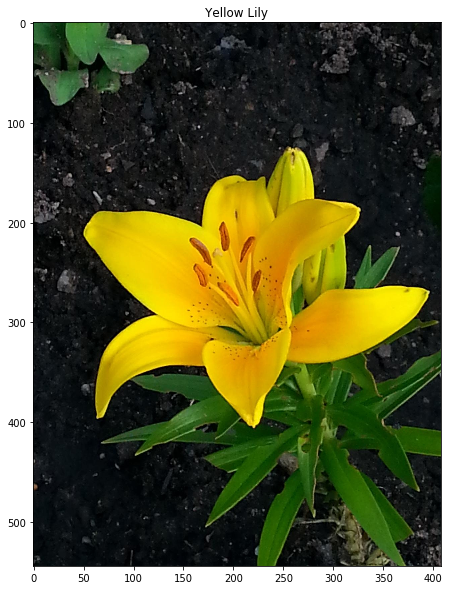

10


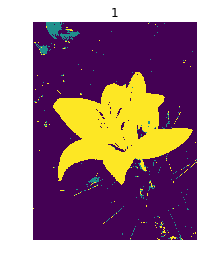

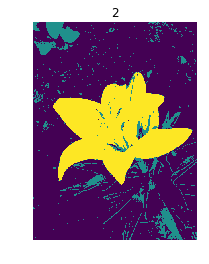

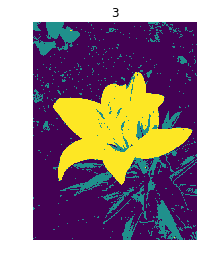

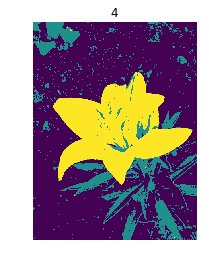

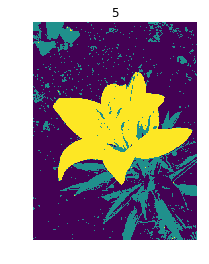

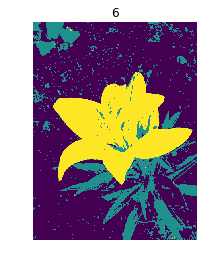

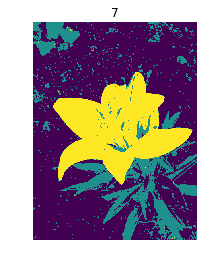

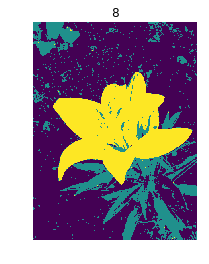

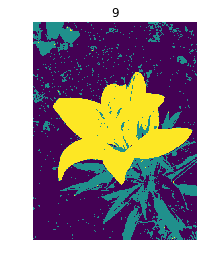

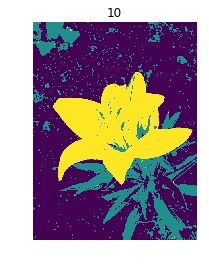

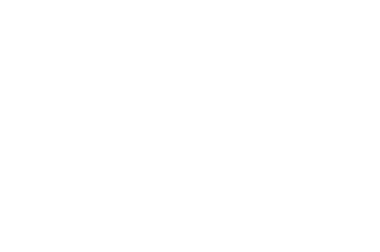

In [3]:
yellowlily = cv2.imread('yellowlily.png')

yellowlily = cv2.cvtColor(yellowlily, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.show(), plt.axis('off')

images = k_means(yellowlily, 3, 10)

print(len(images))
for i in range(len(images)): 
    plt.title(i+1), plt.imshow(images[i])
    plt.show(), plt.axis('off')


### 1.2 Expectation Maximization - Gaussian Mixture Models
#### 1 Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for the overall EM algorithm.
#### 2 Apply GMM to the provided image using the [R,G,B] features. (R,G,B) represents color channels normalized between 0 and 1.
#### 3 Display the resulting segmented images for the first 10 iterations.

In [4]:
# Determine the probability that a Gaussian component 
# is assigned to each sample (xi) based on current estimate 
# of the parameter 
# f(x, mean, std) = (1/mean*sqrt(2pi))*e^((-(x-mean)^2)/2*std^2)

def gaussian_prob(x, mean, std): 
    std_term = 1 / (std * math.sqrt(2 * math.pi))
    e_term = (-np.power((x - mean),2))/(2*np.power(std,2))
    e_pow = np.power(math.e, e_term)
    prob = std_term * e_pow
    # norm
    prob = np.linalg.norm(prob, axis = -1)
    return prob 
 

In [5]:
def Expectation_Maximization(image, c, numOfIteration): 
    
    # return 
    em_image = [] 
    
    # Initialize parameters 
    mean = np.random.random((c,3)) * 255.0
    std = np.full((c, 3), 255.0/c)
    prob = np.random.rand(c)
    prob = prob / np.sum(prob)
    
    for i in range(numOfIteration):
        print("{}th iteration".format(i+1))
        
        # E step 
        # Store probability 
        
        prob_point = np.empty(shape = (image.shape[0],image.shape[1],c))

        for h in range(image.shape[0]):
            for w in range(image.shape[1]):
#                 for center in range(c):
                x = image[h][w]
                prob_point[h][w] = gaussian_prob(x, mean, std)
#                 print(prob_point[h][w])
        
        # calculate sum 
        e_step_sum = np.sum(prob_point * prob, axis=-1)
        e_step_sum = e_step_sum.reshape((image.shape[0], image.shape[1], 1))
        # calculate probability
        print("e_step_sum", e_step_sum)
        prob_point = prob_point / e_step_sum 
        print("prob_point", prob_point)

        # clusters 
        clusters = np.argmax(prob_point, axis=-1)
        print(clusters)
        em_image.append(clusters)
      
        # M step 
        for cluster in range(c):
            for h in range(image.shape[0]):
                for w in range(image.shape[1]):
                    xi = image[h][w]
                    Xi_p = 0
                    Xi_p += xi * prob_point[h, w, cluster]
            # update probability, mean and standard deviation 
            # for each cluster 
            # number of pixels belong to a cluster 
            numPixels = image[clusters == cluster]
            # calculate probability 
            prob[cluster] = np.size(numPixels)/np.size(image)
            print("np.sum(prob_point[:,:,cluster])", np.sum(prob_point[:,:,cluster]))
            mean[cluster] = Xi_p / np.sum(prob_point[:,:,cluster])
            std[cluster] = np.std(numPixels, axis=0)
        
            
#             std[center] = np.sqrt(np.var(n, axis=0))
            print("prob", prob[cluster])
            print("mean", mean[cluster])
            print("std", std[cluster])
                    
    return em_image
        

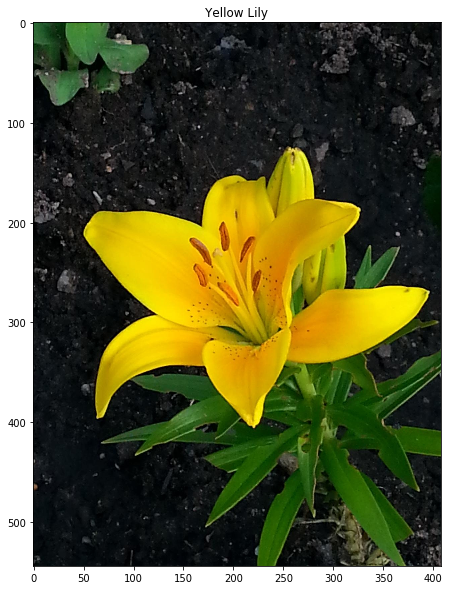

1th iteration
e_step_sum [[[0.00616953]
  [0.00613924]
  [0.00610731]
  ...
  [0.00478392]
  [0.00470129]
  [0.00444907]]

 [[0.00616953]
  [0.00615459]
  [0.00613924]
  ...
  [0.00490624]
  [0.00457592]
  [0.00440652]]

 [[0.00616953]
  [0.00616953]
  [0.00616953]
  ...
  [0.00482492]
  [0.00457592]
  [0.00436383]]

 ...

 [[0.00575331]
  [0.0051827 ]
  [0.00425395]
  ...
  [0.00636209]
  [0.00671497]
  [0.00653407]]

 [[0.00486569]
  [0.00436383]
  [0.00446846]
  ...
  [0.00586544]
  [0.00669435]
  [0.00655889]]

 [[0.00470129]
  [0.00444907]
  [0.00463771]
  ...
  [0.00501748]
  [0.00615283]
  [0.00628444]]]
prob_point [[[1.07736886 0.95427445 0.83750919]
  [1.08007676 0.94517001 0.8414653 ]
  [1.0827202  0.93600239 0.84568689]
  ...
  [1.09692647 0.79594345 0.98504698]
  [1.09715374 0.79357675 0.98743844]
  [1.09762951 0.78673788 0.99486632]]

 [[1.07736886 0.95427445 0.83750919]
  [1.07873069 0.94973051 0.83945406]
  [1.08007676 0.94517001 0.8414653 ]
  ...
  [1.09651803 0.7995825

np.sum(prob_point[:,:,cluster]) 232357.6241331413
prob 0.25728986447520186
mean [0.00028784 0.00026167 0.00026167]
std [80.11410878 49.96255942  3.78557639]
np.sum(prob_point[:,:,cluster]) 235425.92652623972
prob 0.4025329801038062
mean [0.00024818 0.00022562 0.00022562]
std [25.7875149  26.0489924   7.27920716]
np.sum(prob_point[:,:,cluster]) 187944.4091738581
prob 0.3401771554209919
mean [0.00042322 0.00038474 0.00038474]
std [41.42688691 42.80262322 19.18962627]
5th iteration
e_step_sum [[[0.00445681]
  [0.00477776]
  [0.0051181 ]
  ...
  [0.01639114]
  [0.0173872 ]
  [0.02399176]]

 [[0.00445681]
  [0.00461488]
  [0.00477776]
  ...
  [0.01515572]
  [0.01967259]
  [0.02647179]]

 [[0.00445681]
  [0.00445681]
  [0.00445681]
  ...
  [0.01596156]
  [0.01967259]
  [0.02984444]]

 ...

 [[0.00736623]
  [0.01245615]
  [0.03928301]
  ...
  [0.00289898]
  [0.00079458]
  [0.0019617 ]]

 [[0.01555319]
  [0.02984444]
  [0.02220136]
  ...
  [0.00623135]
  [0.00102935]
  [0.00182964]]

 [[0.0173

e_step_sum [[[0.00470737]
  [0.00499201]
  [0.00529572]
  ...
  [0.01603609]
  [0.0172969 ]
  [0.0221792 ]]

 [[0.00470737]
  [0.00484742]
  [0.00499201]
  ...
  [0.01453481]
  [0.01959644]
  [0.02304698]]

 [[0.00470737]
  [0.00470737]
  [0.00470737]
  ...
  [0.01548904]
  [0.01959644]
  [0.02399265]]

 ...

 [[0.00741326]
  [0.01195339]
  [0.02838799]
  ...
  [0.00347011]
  [0.00142235]
  [0.00258999]]

 [[0.01499102]
  [0.02399265]
  [0.0213175 ]
  ...
  [0.00652705]
  [0.00167285]
  [0.00246346]]

 [[0.0172969 ]
  [0.0221792 ]
  [0.01803602]
  ...
  [0.01477124]
  [0.0046304 ]
  [0.00388499]]]
prob_point [[[1.12657225 0.92127941 0.96488697]
  [1.13260924 0.89736502 1.00088664]
  [1.13493856 0.87823975 1.03327434]
  ...
  [1.05126196 0.92424645 1.06776621]
  [1.11347237 0.90063799 1.02232143]
  [1.37624791 0.78832857 0.85388756]]

 [[1.12657225 0.92127941 0.96488697]
  [1.13004392 0.90875035 0.98330307]
  [1.13260924 0.89736502 1.00088664]
  ...
  [1.00274412 0.9376258  1.11261392]


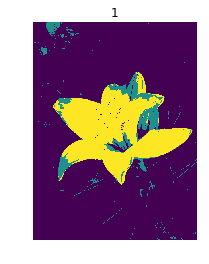

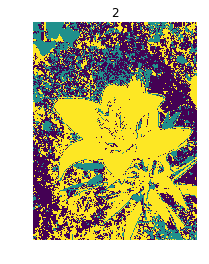

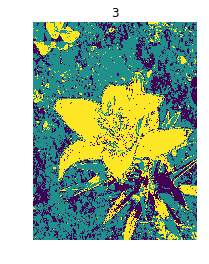

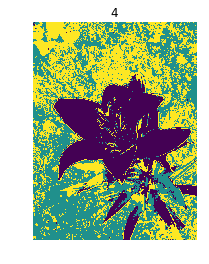

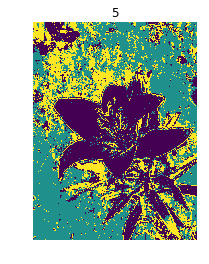

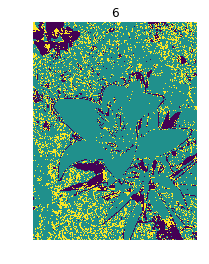

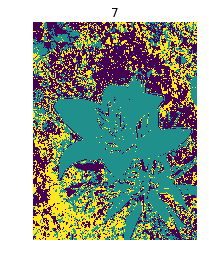

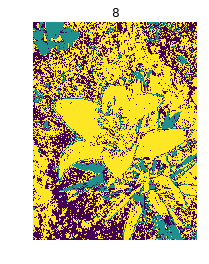

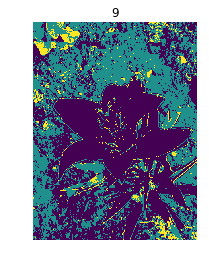

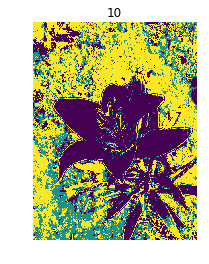

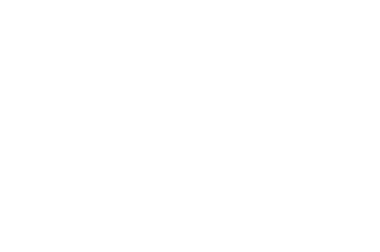

In [6]:
EM_image = yellowlily.copy() 

plt.figure(figsize=(10,10))
plt.imshow(yellowlily),plt.title("Yellow Lily")
plt.show(), plt.axis('off')

output = Expectation_Maximization(EM_image, 3,10)

for i in range(len(output)): 
    plt.title(i+1), plt.imshow(output[i])
    plt.show(), plt.axis('off')


### 1.3 Reasoning question

#### 1 Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?

A k-means cluster has circular shape while a EM Gaussian Mixture Model cluster can have ellipsoid shape. If the data is of ellipsoid shape, a k-means model will not be accurate because the clusters are always circular shaped. Hence, to let k-means and EM give the same solution, the data should define by circle shapes.
(https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php)


# 2 Stereo Vision - Epipolar Geometry

#### Use a stereo image-pair of your choice from the Middlebury dataset: http: //vision.middlebury.edu/stereo/data/scenes2014/ for the following ques- tions. You can use functions from OpenCV and matplotlib for this question

#### 1 Compute matching SIFT keypoints from a stereo image pair.

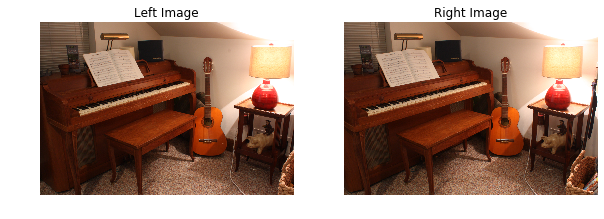

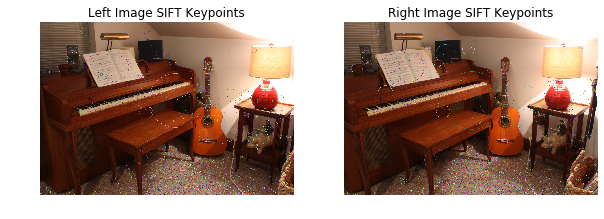

In [7]:
# Display left and right images 
image_left = cv2.imread('im0.png')
image_right = cv2.imread('im1.png')

image_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
image_right = cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image")
plt.axis('off'), plt.imshow(image_left)
plt.subplot(122), plt.title("Right Image")
plt.axis('off'), plt.imshow(image_right)
plt.show()

# Create SIFT object 
sift_obj = cv2.xfeatures2d.SIFT_create() 

# Make Image Copy 
image_left_sift = image_left.copy()
image_right_sift = image_right.copy() 

# compute SIFT keypoint and descriptor 
keypoint_left, des_left = sift_obj.detectAndCompute(image_left, None) 
keypoint_right, des_right = sift_obj.detectAndCompute(image_right, None)

# Draw keypoints 
cv2.drawKeypoints(image_left, keypoint_left, image_left_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image_right, keypoint_right, image_right_sift, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10,10))
plt.subplot(121), plt.title("Left Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_left_sift)
plt.subplot(122), plt.title("Right Image SIFT Keypoints")
plt.axis('off'), plt.imshow(image_right_sift)
plt.show()


#### 2 Compute and display the epipolar lines for both images. 

In [ ]:
# Create Brute-Force Matcher 
bf_Matcher = cv2.BFMatcher(cv2.NORM_L2)

# Match descriptors 
matches = bf_Matcher.knnMatch(des_left, des_right, k=2)

# Store good matches 
goodMatches = [] 
ptsL = []
ptsR = [] 
for i, (m, n) in enumerate(matches):
    if m.distance < 0.6 * n.distance: 
        goodMatches.append(m)
        ptsR.append(keypoint_right[m.trainIdx].pt)
        ptsL.append(keypoint_left[m.queryIdx].pt)
        
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)

# Find fundamental matrix 
# The calculated fundamental matrix can be passed further
# to computeCorrespondEpilines() that finds epipolar lines 
# ref: https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_LMEDS)

# Get inliers 
ptsL = ptsL[mask.ravel()==1]
ptsR = ptsR[mask.ravel()==1]

# Copy Image 
image_left_line = image_left.copy()
image_right_line = image_right.copy() 

# Find epilines 
lines_left = cv2.computeCorrespondEpilines(ptsR, 2, F)
lines_left = lines_left.reshape(-1, 3)
lines_right = cv2.computeCorrespondEpilines(ptsL, 1, F)
lines_right = lines_right.reshape(-1, 3)

# Draw Line Function 
def drawlines(img1, img2, lines, pts1, pts2): 
    row,col,_ = img1.shape
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [col, -(r[2]+r[0]*col)/r[1]])
        # draw lines and points 
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv2.circle(img1, tuple(pt1), 20, color, -1)
        img2 = cv2.circle(img2, tuple(pt2), 20, color, -1)
    return img1, img2

# Draw line 
image_left_line_1, image_right_line_1 = drawlines(image_left_line, image_right_line, lines_left, ptsL, ptsR)
image_right_line_2, image_left_line_2 = drawlines(image_right_line, image_left_line, lines_right, ptsR, ptsL)

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(image_left_line_1)
plt.title("Left Image"), plt.axis('off')
plt.subplot(222), plt.imshow(image_right_line_1)
plt.title("Right Image"), plt.axis('off')
plt.subplot(223), plt.imshow(image_left_line_2)
plt.title("Left Image"), plt.axis('off')
plt.subplot(224), plt.imshow(image_right_line_2)
plt.title("Right Image"), plt.axis('off')

In [ ]:
Pick any one keypoint in the left image which has a correct match in the right image, and is on the corresponding epipolar line. Extract a patch of size (5 × 5) around this keypoint in the left image. 